# COSC311 Lab 3
##### JJ McCauley
Datasets: Bajaia_Region.csv, Sidi-Bel_Abbes_Region.csv

In [77]:
'''Imports & Such'''
import pandas as pd
import numpy as np
import seaborn as sb
from collections import Counter
import matplotlib.pyplot as plt
import math

'''Loading in datasets'''
b = pd.read_csv("Bejaia_Region.csv")
s = pd.read_csv("Sidi-Bel_Abbes_Region.csv", sep=",", on_bad_lines='skip')

## Task 1
Using Bejaia dataset, calculate mean values of Temperature, RH, Ws, and Rain for 'fire' and 'not fire' classes

Means:
           Temperature         RH         Ws      Rain
Fire        32.894737  63.385965  15.596491  0.014035
Not Fire    29.661290  71.967742  16.322581  1.529032


Text(0.5, 1.0, 'Mean values of Temperature, RH, Ws, and Rain for Fire and No Fire')

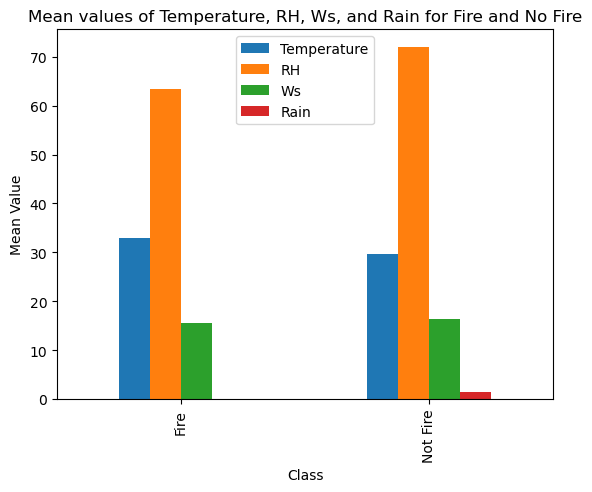

In [79]:
b_means_fire = b[b['Classes'] == 'fire'][['Temperature', 'RH', 'Ws', 'Rain']].mean()
b_means_notfire = b[b['Classes'] == 'not fire'][['Temperature', 'RH', 'Ws', 'Rain']].mean()
b_means = pd.DataFrame({'Fire': b_means_fire, 'Not Fire': b_means_notfire})  #Combine into one dataframe

b_means = b_means.T # Transpose for better plotting

# Print the means
print("Means:\n", b_means)

b_means.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.title("Mean values of Temperature, RH, Ws, and Rain for Fire and No Fire")


## Task 2
Using the " Sidi-Bel Abbes Region Dataset", calculate and show the median values of four
attributes ("FFMC", "DMC", "DC" and "ISI", respectively) 

In [80]:
# Calculating the median values
s_FFMC_median = s['FFMC'].median()
s_DMC_median = s['DMC'].median()
s_DC_median = s['DC'].median()
s_ISI_median = s['ISI'].median()

# Printing the median values
print('FFMC Median:', s_FFMC_median)
print('DMC Median:', s_DMC_median)
print('DC Median:', s_DC_median)
print("ISI Median:", s_ISI_median)

FFMC Median: 84.7
DMC Median: 13.3
DC Median: 32.1
ISI Median: 4.5


## Task 3
Using the "Bejaia Region Dataset", calculate and show the 25-percent, 60-percent, and 75-
percent quantiles of four attributes ("Temperature", "RH", "Ws" and "Rain", respectively)

In [81]:
# Declaring quantiles that we are looking for
quantiles = [0.25, 0.6, 0.75]

# Applying these quantiles to the df
result = b[['Temperature', 'RH', 'Ws', 'Rain']].quantile(quantiles)  # Credit to Pandas documentation on quantiles

print("Qualtiles for Temperature, RH, Ws, and Rain:\n", result) 


Qualtiles for Temperature, RH, Ws, and Rain:
       Temperature     RH    Ws  Rain
0.25         29.0  60.00  14.0   0.0
0.60         32.0  73.00  17.0   0.1
0.75         34.0  77.75  18.0   0.5


## Task 4
Using the "Sidi-Bel Abbes Region Dataset", calculate and show the standard deviation
values of four attributes ("Temperature", " Rain", "BUI" and "FWI", respectively)

In [82]:
result = s[['Temperature', 'Rain', 'BUI', 'FWI']].std()

print("Standard Deviation:\n", result)

Standard Deviation:
 Temperature     3.674103
Rain            1.492296
BUI            13.919595
FWI             8.169444
dtype: float64


## Task 5
Using the "Bejaia Region Dataset", calculate and show the “correlation coefficient” 
between “RH” and each of the following attributes ("Temperature", "Ws", "Rain", 
"FFMC", "DMC", "DC", "ISI", "BUI" and "FWI"), respectively. Then, describe what attribute had the strongest positive and negative correlation to the attribute 'RH'

In [83]:
# Find correlations for all columns
correlation_Ws = b['RH'].corr(b['Ws'])
correlation_Rain = b['RH'].corr(b['Rain'])
correlation_FFMC = b['RH'].corr(b['FFMC'])
correlation_DMC = b['RH'].corr(b['DMC'])
correlation_DC = b['RH'].corr(b['DC'])
correlation_ISI = b['RH'].corr(b['ISI'])
correlation_BUI = b['RH'].corr(b['BUI'])
correlation_FWI = b['RH'].corr(b['FWI'])

# Print all correlations
print('Pearson Correlation Coefficients:')
print('Ws:  \t', correlation_Ws)
print('Rain:\t', correlation_Rain)
print('FFMC:\t', correlation_FFMC)
print('DMC: \t', correlation_DMC)
print('DC:  \t', correlation_DC)
print('ISI: \t', correlation_ISI)
print('BUI: \t', correlation_BUI)
print('FWI: \t', correlation_FWI)

Pearson Correlation Coefficients:
Ws:  	 0.24577445895806885
Rain:	 0.32916261703566424
FFMC:	 -0.6531529118901975
DMC: 	 -0.34708013592219356
DC:  	 -0.31427122383070866
ISI: 	 -0.5864099949298507
BUI: 	 -0.3382326363037557
FWI: 	 -0.4760673581458338


#### Interpretations
According to these correlation coefficients:
- **Rain** has the **strongest positive correlation**. This is due to the rain coefficient being the number closest to positive one. This means that, as rain increases, RH also tends in increase.
- **FFMC** has the **strongest negative correlation**. This is due to the FFMC coefficient being the number closest to negative one. This means that, as FFMC increases, RH tends to decrease. 

## Task 6
Assume you need to select some attributes or design some new attributes 
to distinguish these two classes ("not fire" and "fire") as accurate as possible, which attributes you 
would like to select or what new attributes you would like to design?

Pearson Correlation Coefficients for Binary Classes in Bejaia Region:
RH:  	 -0.3834811194122299
Ws:  	 -0.12659583774880867
Rain:	 -0.32129310609160344
FFMC:	 0.7388599686433502
DMC: 	 0.6190688278735985
DC:  	 0.5826311287158819
ISI: 	 0.8298294975888818
BUI: 	 0.6127899074970974
FWI: 	 0.7558274608492928

Pearson Correlation Coefficients for Binary Classes in Sidi-Bel Abbes Region:
RH:  	 -0.4405004007849388
Ws:  	 0.0469940395965059
Rain:	 -0.4745895630047299
FFMC:	 0.7955001635694371
DMC: 	 0.5370942522303483
DC:  	 0.4648270918647558
ISI: 	 0.6961903143378555
BUI: 	 0.5488400121123898
FWI: 	 0.6840788729602792


Bejaia Region Variances
Temperature
Fire:  5.703007518796986 | Not Fire: 10.785034373347433
RH
Fire:  80.70551378446115 | Not Fire: 133.86779481755687
Ws
Fire:  5.56641604010025 | Not Fire: 10.648334214701215
Rain
Fire:  0.0033709273182957423 | Not Fire: 9.704061343204653
FFMC
Fire:  6.853934837092729 | Not Fire: 203.09358276044415
DMC
Fire:  116.29152882205514 | Not Fire

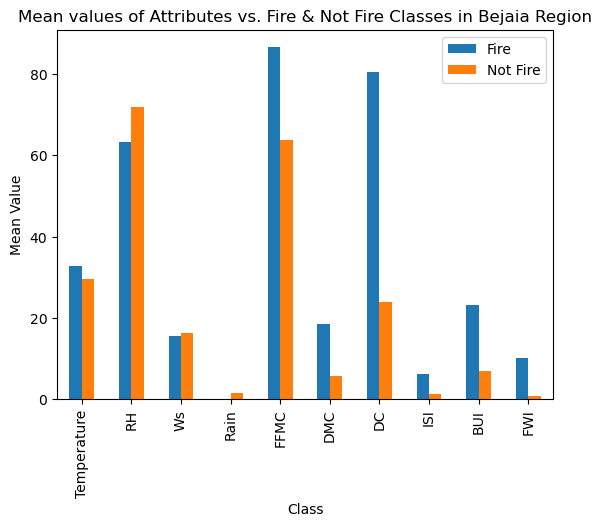

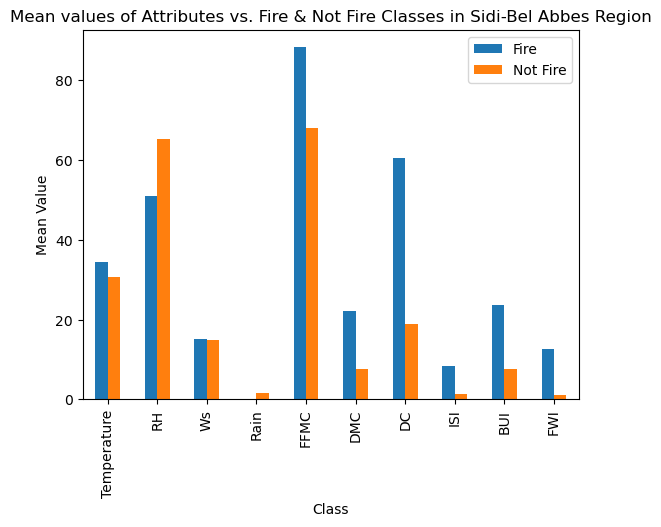

In [100]:
'''Approach:
1) Show that Rain is an indicative factor, Ws is not (bar graph)
2) Find correlations (Pearson)
3) Variance analysis on significant correlations
4) Go super in depth then
month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes'''

#1) Plotting all attributes on a bar graph to visually inspect
b_means_fire = b[b['Classes'] == 'fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']].mean()
b_means_notfire = b[b['Classes'] == 'not fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']].mean()
b_means = pd.DataFrame({'Fire': b_means_fire, 'Not Fire': b_means_notfire})  #Combine into one dataframe
b_means.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.title("Mean values of Attributes vs. Fire & Not Fire Classes in Bejaia Region")

s_means_fire = s[s['Classes'] == 'fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']].mean()
s_means_notfire = s[s['Classes'] == 'not fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']].mean()
s_means = pd.DataFrame({'Fire': s_means_fire, 'Not Fire': s_means_notfire})  #Combine into one dataframe
s_means.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.title("Mean values of Attributes vs. Fire & Not Fire Classes in Sidi-Bel Abbes Region")

#2) Finding correlations between attributes and Fire/Not Fire (Pearson Correlation)
# Converting classes to binary representation
b['Classes_binary'] = b['Classes'].map({'fire': 1, 'not fire': 0})
b.dropna()
s['Classes_binary'] = s['Classes'].map({'fire': 1, 'not fire': 0})
s.dropna()
# Find correlations for all columns for Bejaia
correlation_Classes_RH_b = b['Classes_binary'].corr(b['RH'])
correlation_Classes_Ws_b = b['Classes_binary'].corr(b['Ws'])
correlation_Classes_Rain_b = b['Classes_binary'].corr(b['Rain'])
correlation_Classes_FFMC_b = b['Classes_binary'].corr(b['FFMC'])
correlation_Classes_DMC_b = b['Classes_binary'].corr(b['DMC'])
correlation_Classes_DC_b = b['Classes_binary'].corr(b['DC'])
correlation_Classes_ISI_b = b['Classes_binary'].corr(b['ISI'])
correlation_Classes_BUI_b = b['Classes_binary'].corr(b['BUI'])
correlation_Classes_FWI_b = b['Classes_binary'].corr(b['FWI'])
# Print all correlations for Bejaia
print('Pearson Correlation Coefficients for Binary Classes in Bejaia Region:')
print('RH:  \t', correlation_Classes_RH_b)
print('Ws:  \t', correlation_Classes_Ws_b)
print('Rain:\t', correlation_Classes_Rain_b)
print('FFMC:\t', correlation_Classes_FFMC_b)
print('DMC: \t', correlation_Classes_DMC_b)
print('DC:  \t', correlation_Classes_DC_b)
print('ISI: \t', correlation_Classes_ISI_b)
print('BUI: \t', correlation_Classes_BUI_b)
print('FWI: \t', correlation_Classes_FWI_b)
# Find correlations for all columns for Sidi-Bel Abbes
correlation_Classes_RH_s = s['Classes_binary'].corr(s['RH'])
correlation_Classes_Ws_s = s['Classes_binary'].corr(s['Ws'])
correlation_Classes_Rain_s = s['Classes_binary'].corr(s['Rain'])
correlation_Classes_FFMC_s = s['Classes_binary'].corr(s['FFMC'])
correlation_Classes_DMC_s = s['Classes_binary'].corr(s['DMC'])
correlation_Classes_DC_s = s['Classes_binary'].corr(s['DC'])
correlation_Classes_ISI_s = s['Classes_binary'].corr(s['ISI'])
correlation_Classes_BUI_s = s['Classes_binary'].corr(s['BUI'])
correlation_Classes_FWI_s = s['Classes_binary'].corr(s['FWI'])
# Print all correlations for Sidi-Bel Abbes
print('\nPearson Correlation Coefficients for Binary Classes in Sidi-Bel Abbes Region:')
print('RH:  \t', correlation_Classes_RH_s)
print('Ws:  \t', correlation_Classes_Ws_s)
print('Rain:\t', correlation_Classes_Rain_s)
print('FFMC:\t', correlation_Classes_FFMC_s)
print('DMC: \t', correlation_Classes_DMC_s)
print('DC:  \t', correlation_Classes_DC_s)
print('ISI: \t', correlation_Classes_ISI_s)
print('BUI: \t', correlation_Classes_BUI_s)
print('FWI: \t', correlation_Classes_FWI_s)

#3) Calculate variance for high-correlation features
# Isolate the datasets into fire, not fire
b_fire = b[b['Classes'] == 'fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']]
b_notfire = b[b['Classes'] == 'not fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']]
s_fire = s[s['Classes'] == 'fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']]
s_notfire = s[s['Classes'] == 'not fire'][['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', \
    'ISI', 'BUI', 'FWI']]
# Print each correlation
print("\n\nBejaia Region Variances")
for col in b_fire:  # Tired of typing stuff out so similar output can be acheived with for loop
    print(col)
    print("Fire: ", b_fire[col].var(), "| Not Fire:", b_notfire[col].var())
print("\nSidi-Bel Abbes Region Variances")
for col in s_fire: 
    print(col)
    print("Fire: ", s_fire[col].var(), "| Not Fire: ", s_notfire[col].var())
    
print('Covariance for FFMC & FWI for Bejaia Region: ', b['FFMC'].cov(b['FWI']))
print('\tCorrelation: ', b['FFMC'].corr(b['FWI']))
print('Covariance for FFMC & FWI for Sidi-Bel Abbes Region: ', s['FFMC'].cov(s['FWI']))
print('\tCorrelation: ', s['FFMC'].corr(s['FWI']))

## Task 6 Analysis

#### Rain
As seen simply in the bar graph, there were no fires when it rained. Threrefore, it can be concluded that rainy days are helpful in depicting that there will not be a fire. However, when it is not a rainy day, there may or may not be a fire. Therefore, other attributes must be involved.

#### The Strongest Correlations
FWI, ISI, and FWI shared among the highest correlations to fires, outperforming other metrics such as BUI, and DMC. Both showcased a strong positive relationship among the two regions. Therefore, these would be good correspondants for distuinguishing between the classes. However, the variances among 'fire' and 'not fire' showcases the key differences on their reliability.

##### FFMC
When examining the variances of FWI, it appears to be significantly smaller when there are fires vs. when there are no fires. This means that FWI fits into a tighter range when there are Fires, vs a generally larger range when there are no fires. This can be helpful when determining a 'Fire' classification.

##### ISI
ISI, on the other hand, has a larger variance in the 'Not Fire' class when compared to the 'Fire' class. This means that the ISI fits into a tighter range when there are not Fires vs. when there are Fires. This could also be helpful when determinating classification, identifying when there is a 'Not Fire' classification.

##### FWI
With correlation numbers lower than ISI but close to FFMC, FWI showcases the same properties as ISI in terms of variance.

#### Other Attributes
Some other important attributes that shared correlations slightly lower than FWI and FFMC are:
- BUI
- DMC
All of these attributes work similarly to ISI, in the sense that they would likely be better at identifying 'No Fires'. However, they all shared lower correlations than FWI & ISI.

#### Insignificant Attributes
Through the various tests, the following attributes showcased low correlation and ultimately little connection to the Classes:
- RH
- Temperature
- Ws (Wind Speed)
- DC

#### Conclusion
In conclusion, the most important attributes when predicting 'Fire' and 'No Fire' are:
- **ISI**: Highest correlation, potentially good at classifying 'No Fire'
- **FFMC**: Slightly lower correlation than ISI, however good at classifying 'Fire'
- **FWI**: Similar to FFMC in correlation and ISI in intent when classifying.
- **Rain**: When present, always correctly classifies 'No Fire'. However, not helpful during the typical day when rain is not present.
These would be the most important attributes to include, showing the clearest connection to the classes. 